In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px

In [10]:
df = pd.read_csv("F:/PYTHAN/PYTHAN/iNeuron/EDA/EDA-Used-CAr-PRediction-main/EDA-Used-CAr-PRediction-main/data/cardekho_dataset.csv",index_col=[0])

In [11]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [12]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [16]:
df.shape

(15411, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [18]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [21]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [29]:
# To seprate out numerical data and categorical data
df_num = []
df_cat = []
for i in df.columns:
    if df[i].dtypes == 'O':
        df_cat.append(i)
    else:
        df_num.append(i)

In [27]:
df[df_num].head(2)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.7,796,46.3,5,120000
1,5,20000,18.9,1197,82.0,5,550000


In [28]:
df[df_cat].head(2)

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual


In [54]:
df_cat

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [55]:
len(df_cat)

6

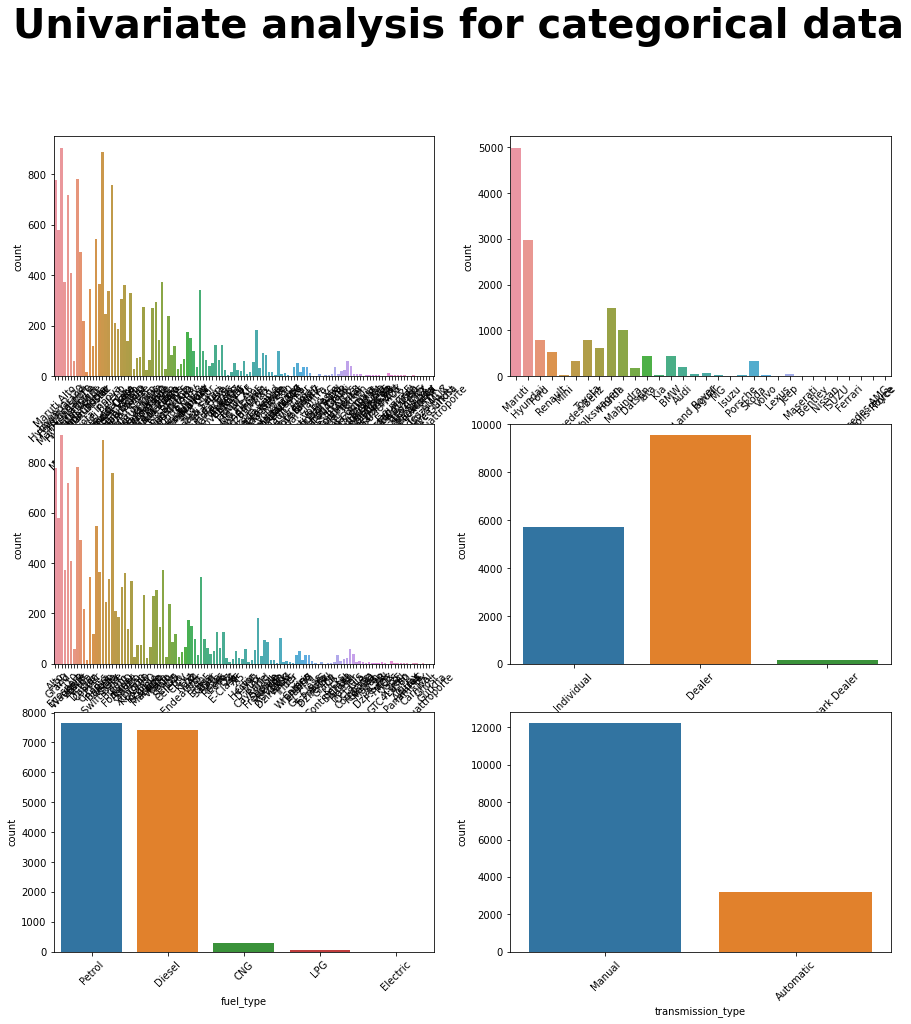

In [161]:
# Univariate analysis for categorical data

plt.figure(figsize = (15,15))
plt.suptitle("Univariate analysis for categorical data",fontsize = 40, fontweight = 'bold',y = 1 )
for i in range(0,len(df_cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df[df_cat[i]])
    plt.xlabel(df_cat[i])
    plt.xticks(rotation=45)
  

              



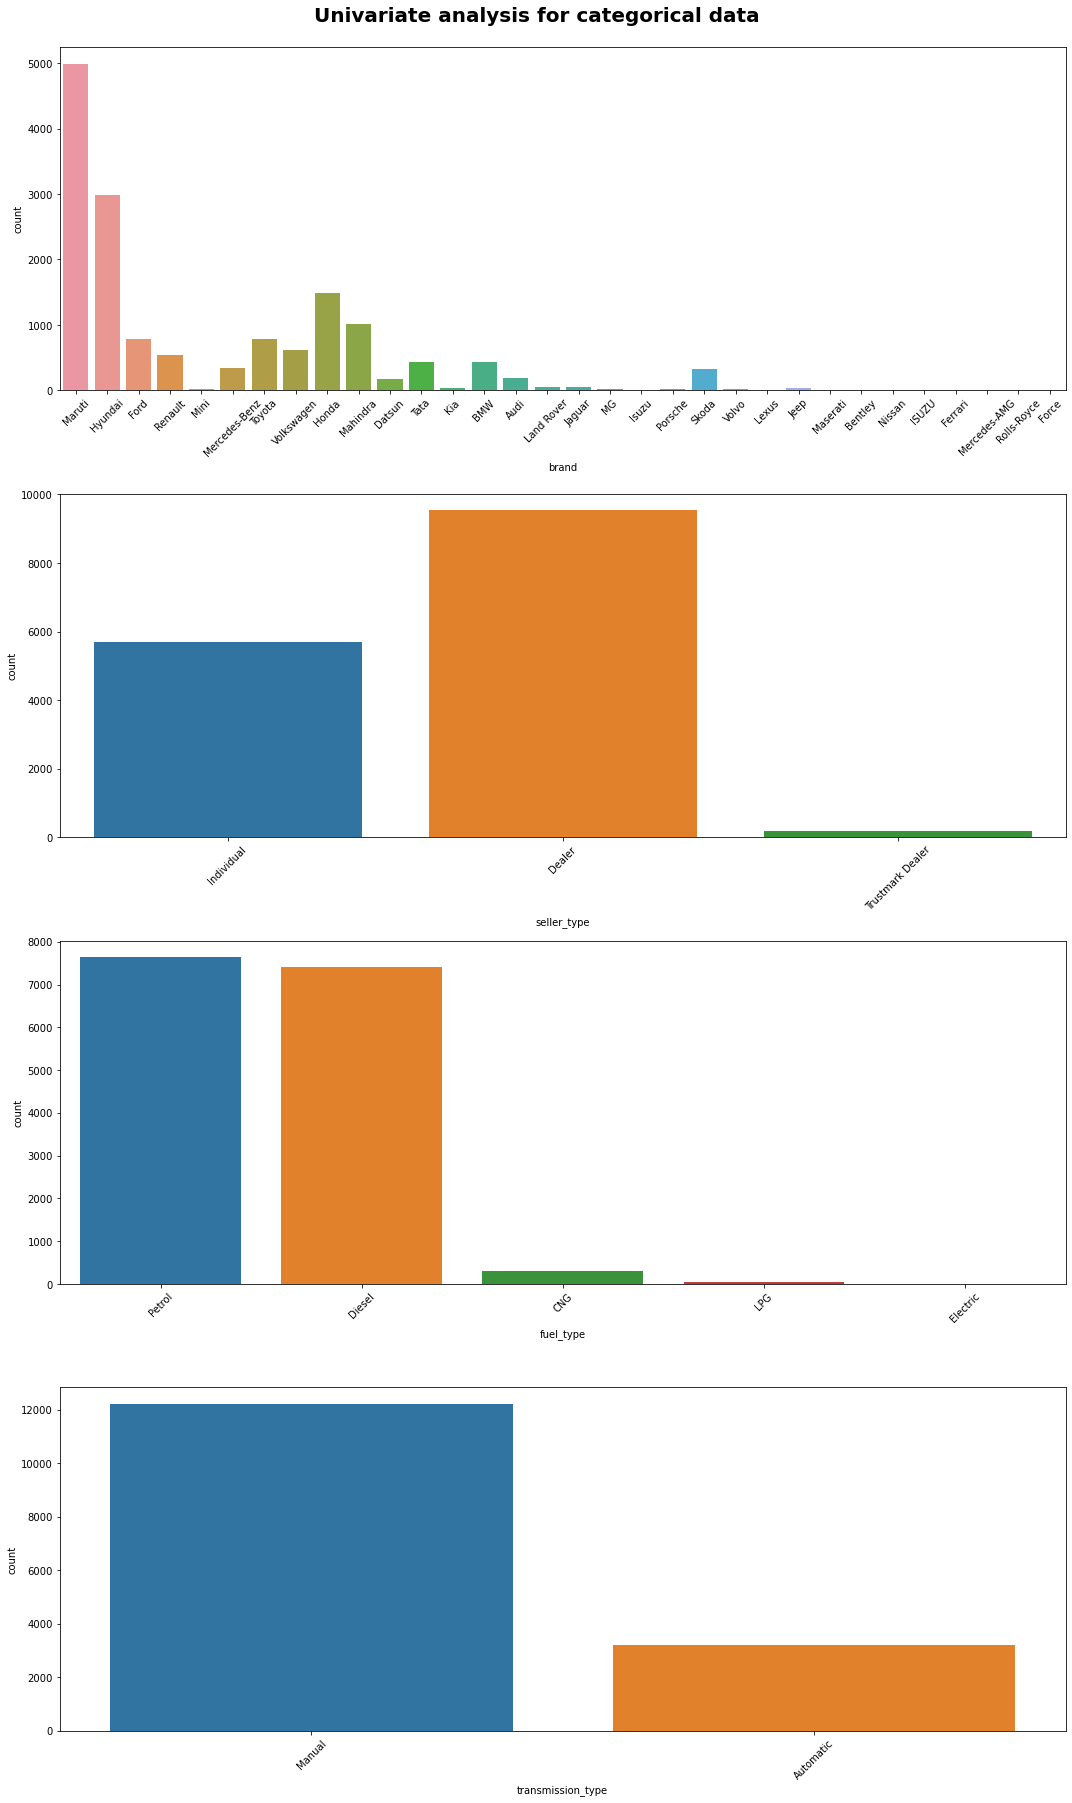

In [153]:
# Above fig is not showing properly
p = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize = (15,25))
plt.suptitle("Univariate analysis for categorical data",fontsize = 20, fontweight = 'bold',y = 1 )
for i in range(0,len(p)):
    plt.subplot(4, 1, i+1)
    sns.countplot(x = df[p[i]])
    plt.xlabel(p[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),
 [Text(0, 0, 'Maruti Alto'),
  Text(1, 0, 'Hyundai Grand'),
  Text(2, 0, 'Hyundai i20'),
  Text(3, 0, 'Ford Ecosport'),
  Text(4, 0, 'Maruti Wagon R'),
  Text(5, 0, 'Hyundai i10'),
  Text(6, 0, 'Hyundai Venue'),
  Text(7, 0, 'Maruti Swift'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Renault Duster'),
  Text(1

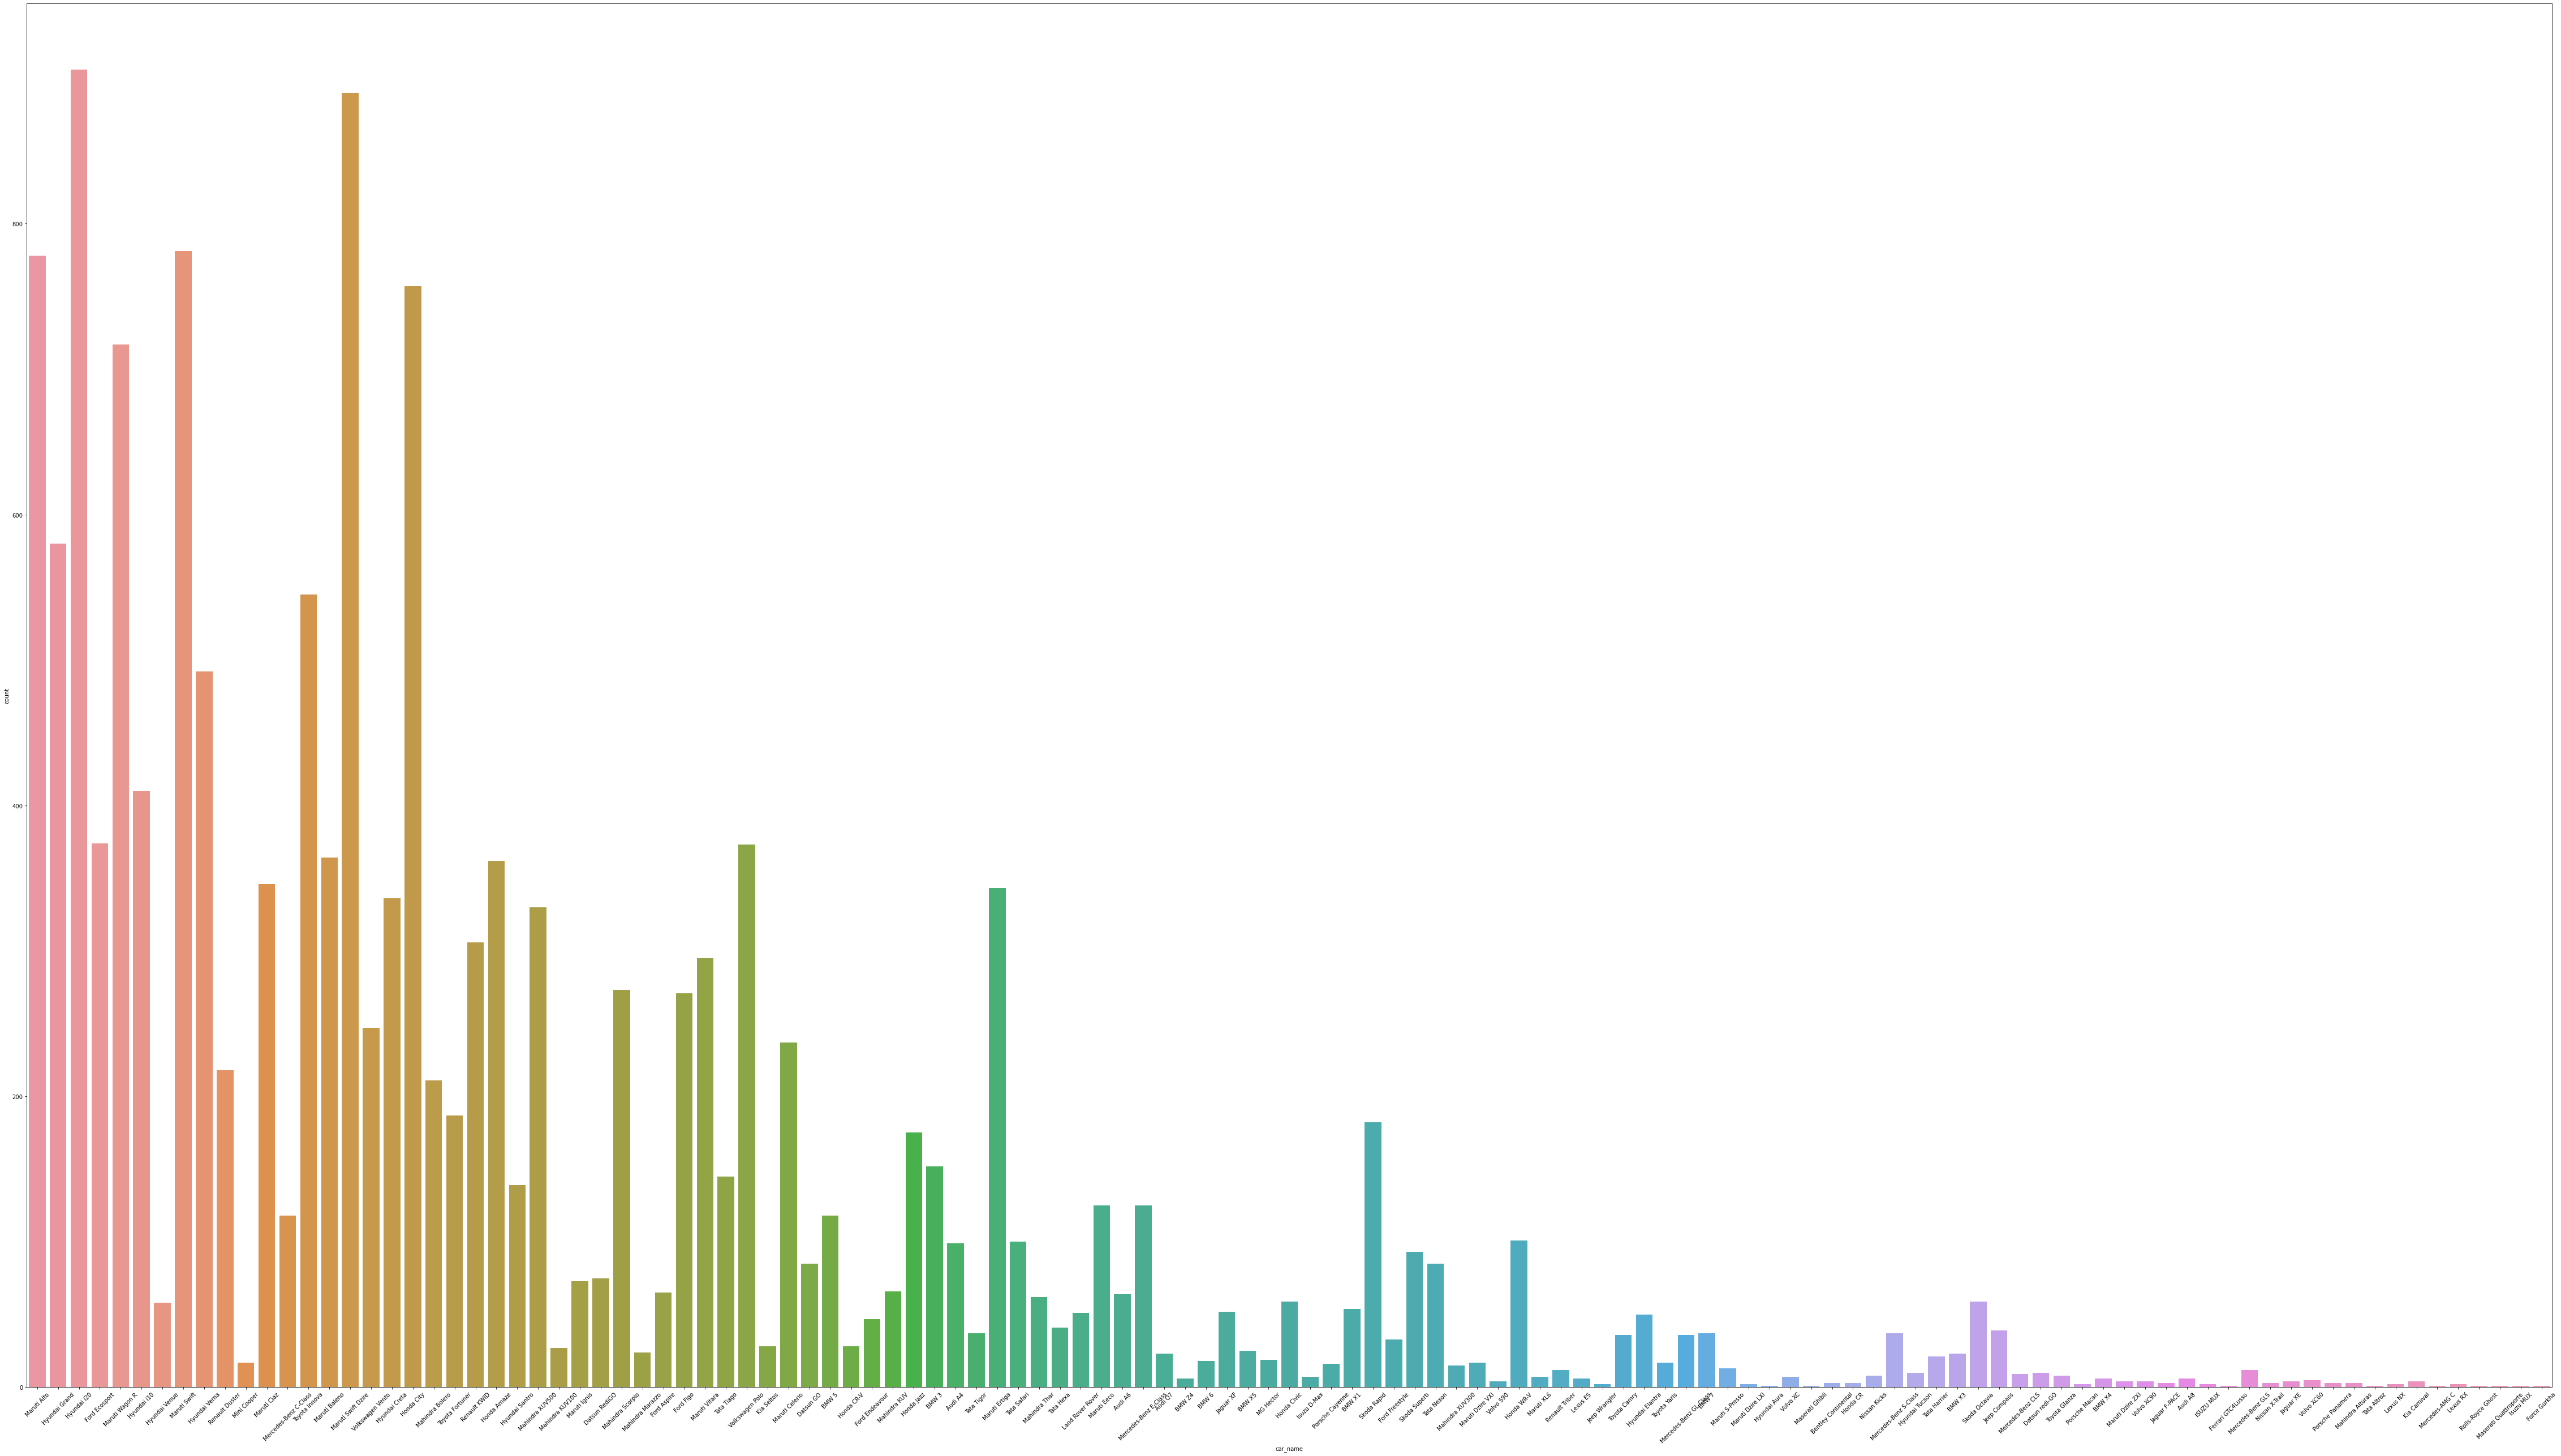

In [135]:
plt.figure(figsize = (80,45))
sns.countplot(df['car_name'])
plt.xlabel('car_name')
plt.xticks(rotation = 45)
   
  
    

# Bivariate_analysis of all numerical features

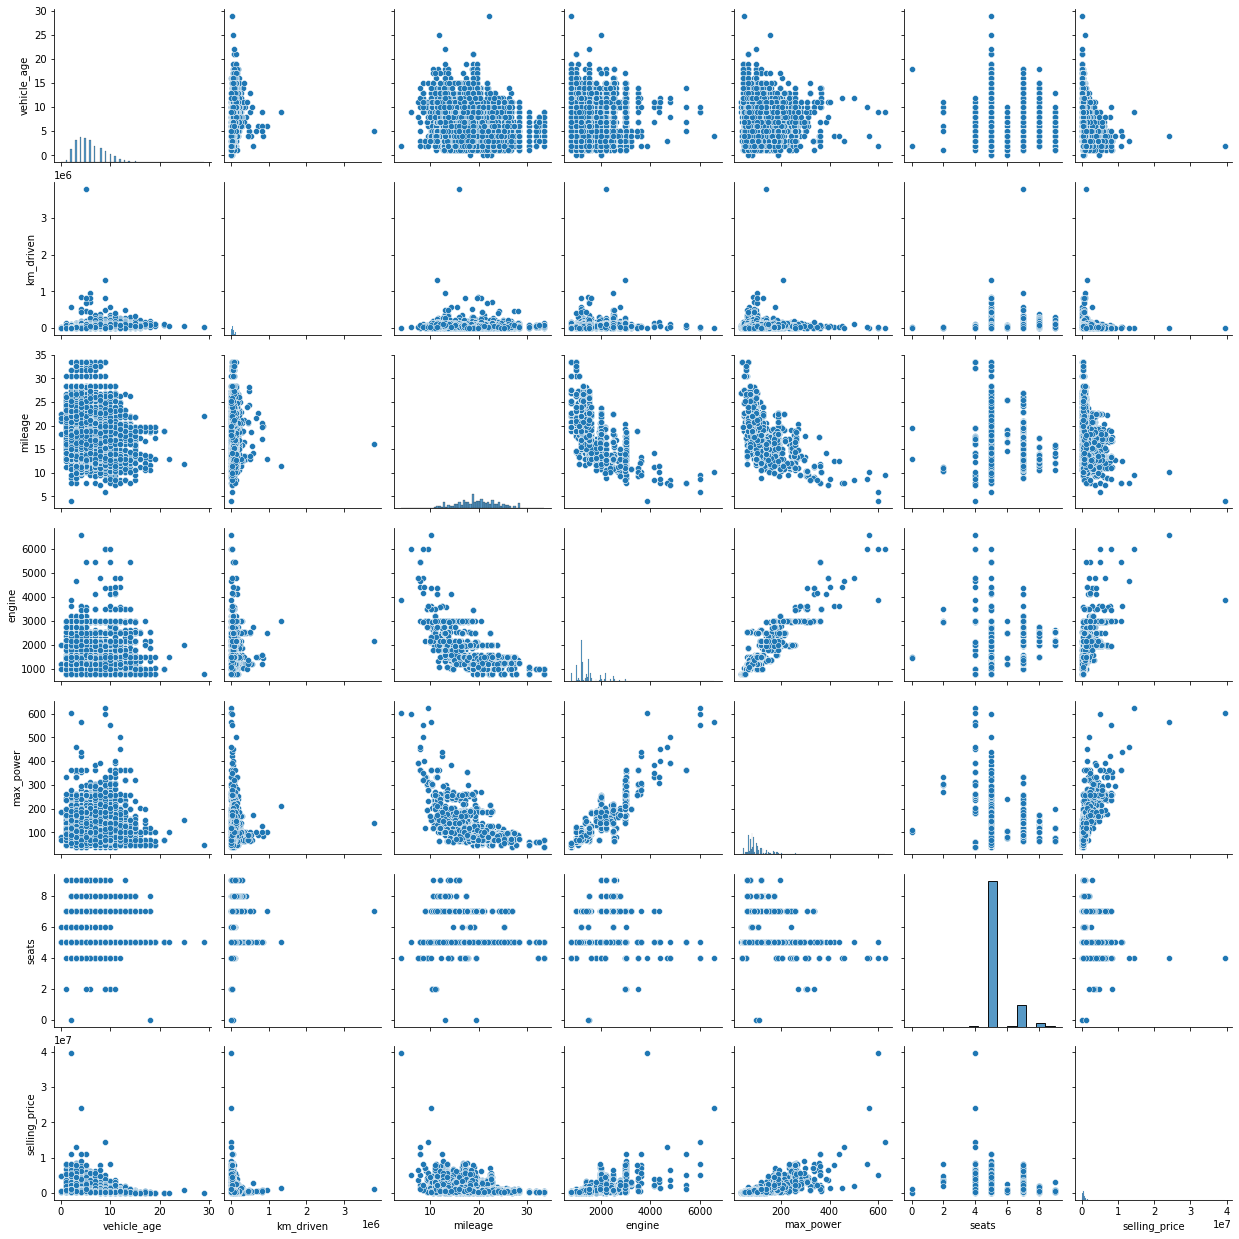

In [425]:
sns.pairplot(df)


In [138]:
df[df_num].head(2)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.7,796,46.3,5,120000
1,5,20000,18.9,1197,82.0,5,550000


In [145]:
df_num

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

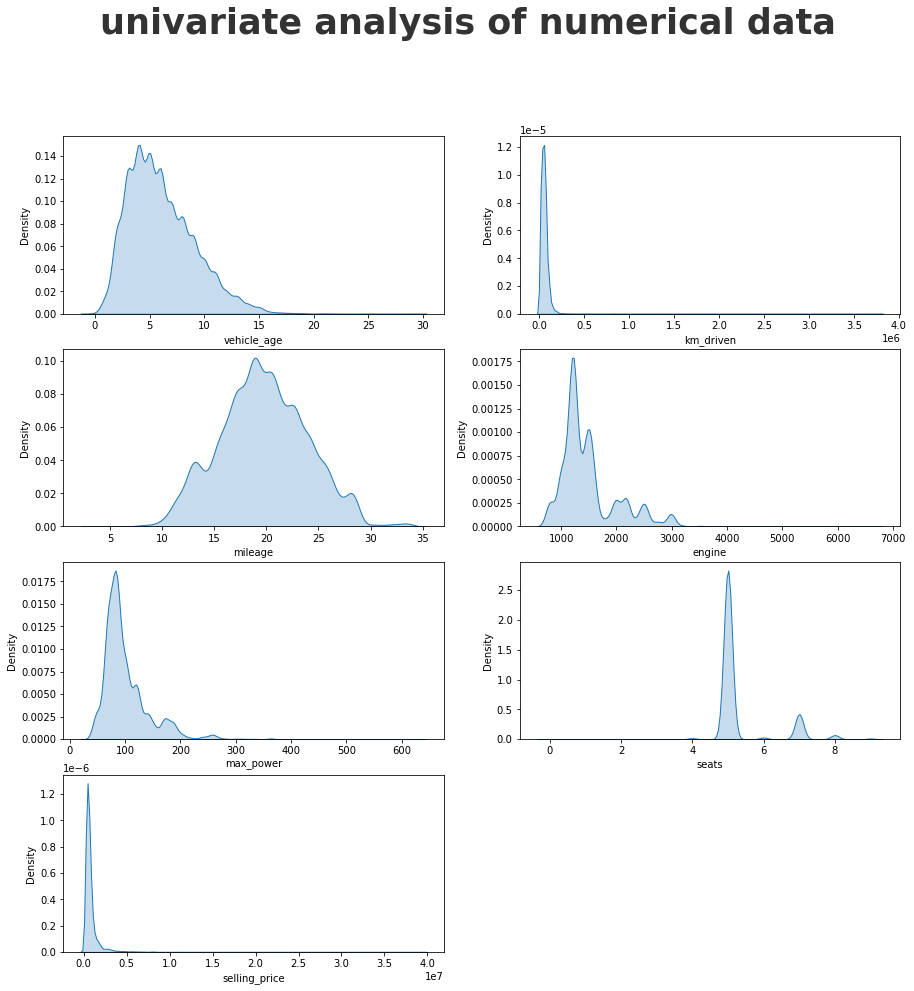

In [160]:
plt.figure(figsize = (15,15))
plt.suptitle('univariate analysis of numerical data',fontsize = 35 ,fontweight='bold', alpha=0.8, y=1.)
r = ['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price']
for i in range(len(r)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(df[r[i]],shade=True)
    plt.xlabel(r[i])
   
    

# Report

Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
Outliers in km_driven, enginer, selling_price, and max power.

# Multivariate Analysis

Check Multicollinearity in Numerical features

In [163]:
df.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


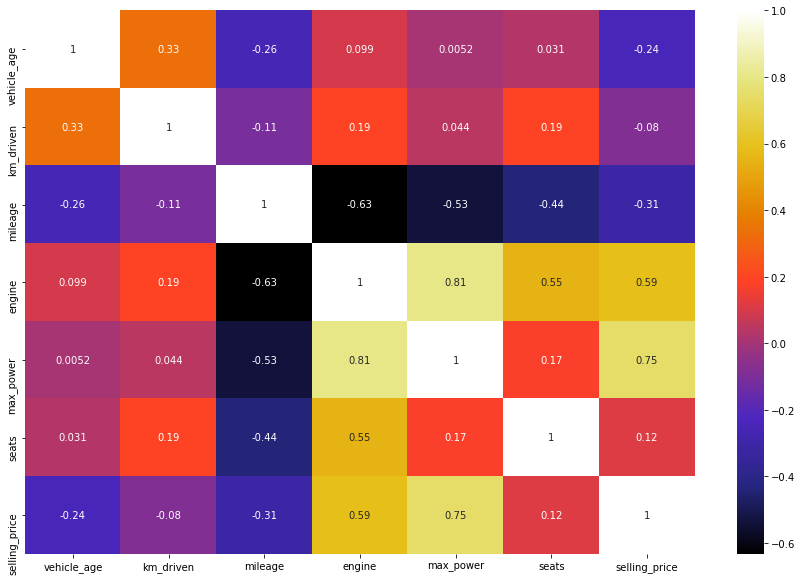

In [175]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [176]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


# checking null value or missing value

In [179]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

So there is no missing value

# Bivariate Analysis with selling prices(output feature)

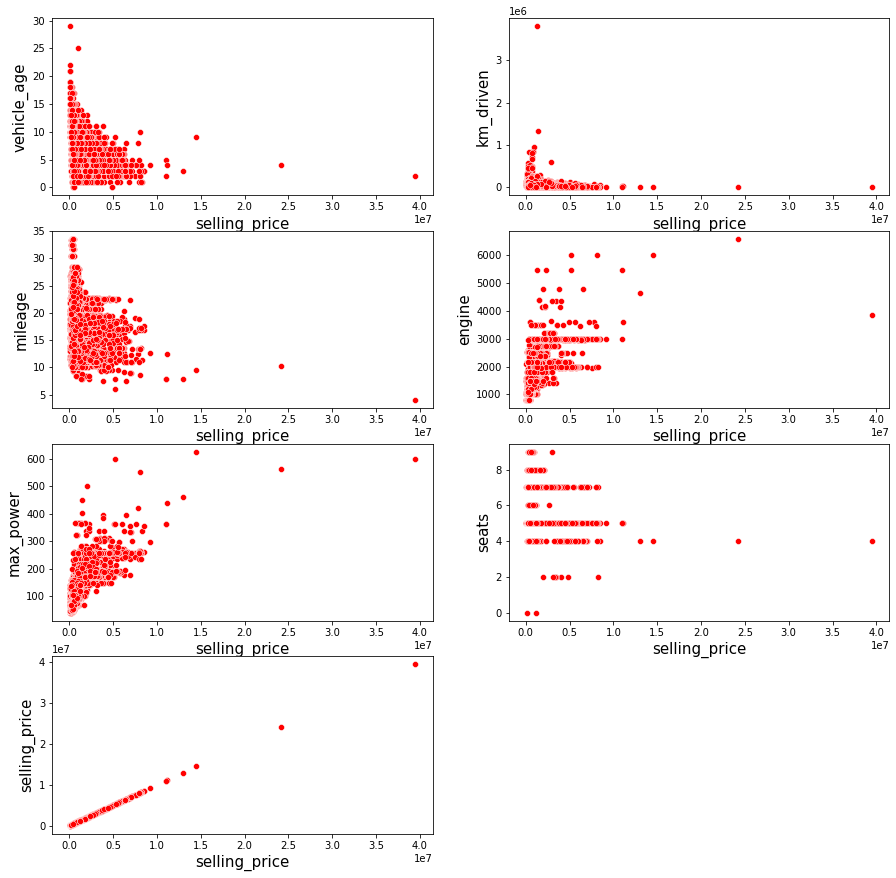

In [202]:
r = ['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price']
plt.figure(figsize = (15,15))
for i in range(len(r)):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data = df , x = "selling_price" , y = r[i], color = 'r' )
    plt.ylabel(r[i], fontsize = 15)
    plt.xlabel("selling_price",fontsize = 15)
    


Report

#Lower Vehicle age has more selling price than Vehicle with more age.
#Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
#Kms Driven has negative effect on selling price.

In [184]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Most Car sold 

In [ ]:


z = df['car_name'].value_counts().iloc[:10]

In [222]:
z

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

In [195]:
import cufflinks as cf
cf.go_offline()

<Figure size 2880x2160 with 0 Axes>

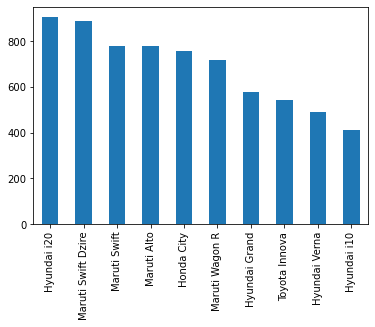

<Figure size 2880x2160 with 0 Axes>

In [221]:
z.plot(kind = 'bar')
plt.figure(figsize = (40,30))

In [203]:
df.head(1)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000


In [239]:
df[df['car_name']== 'Hyundai i20']['selling_price'].mean()

543603.7527593819

In [240]:
df[['car_name','selling_price']]

,car_name,selling_price
0,Maruti Alto,120000
1,Hyundai Grand,550000


# Most car sold is hyundai i20 and its average selling price = 543603

In [241]:
v = df['brand'].value_counts().iloc[:11]

In [218]:
v

Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Name: brand, dtype: int64

<AxesSubplot:xlabel='Brand'>

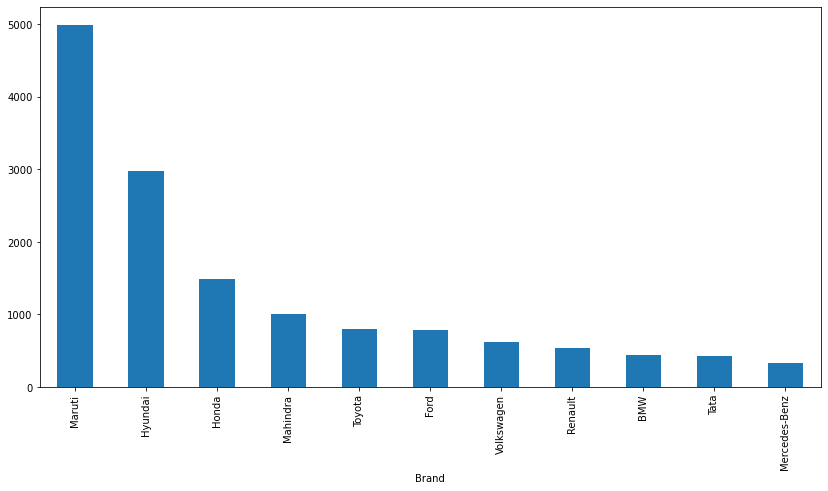

In [245]:
plt.figure(figsize = (14,7))
plt.xlabel('Brand')
v.plot(kind = 'bar')

In [247]:
df[df['brand']== 'Maruti']['selling_price'].mean()

487089.3179086539

# Report:

As per the Chart  Maruti is the most sold brand.
Following Maruti we have Hyundai and Honda.
Mean Price of Maruti Brand is 4.8 lakhs.

In [248]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [252]:
df['model'].value_counts().iloc[:10]

i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
Wagon R        717
Grand          580
Innova         545
Verna          492
i10            410
Name: model, dtype: int64

<AxesSubplot:>

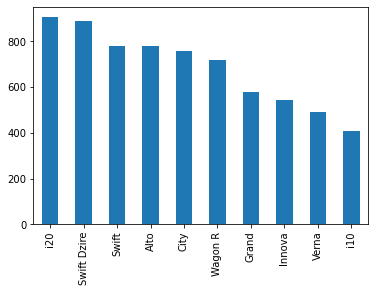

In [254]:
(df['model'].value_counts().iloc[:10]).plot(kind = 'bar')

In [265]:
y = df.groupby('brand').selling_price.max().sort_values(ascending=False)

In [266]:
y

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Jaguar            6300000
Maserati          6200000
Jeep              5600000
Mercedes-AMG      5100000
Mini              3875000
Toyota            3650000
Skoda             3550000
Kia               3525000
Ford              3200000
Honda             3200000
Mahindra          2950000
Hyundai           2600000
Isuzu             2300000
MG                2075000
ISUZU             1900000
Tata              1750000
Nissan            1450000
Volkswagen        1250000
Maruti            1225000
Renault           1155000
Force              700000
Datsun             650000
Name: selling_price, dtype: int64

Text(0.5, 0, 'Brand')

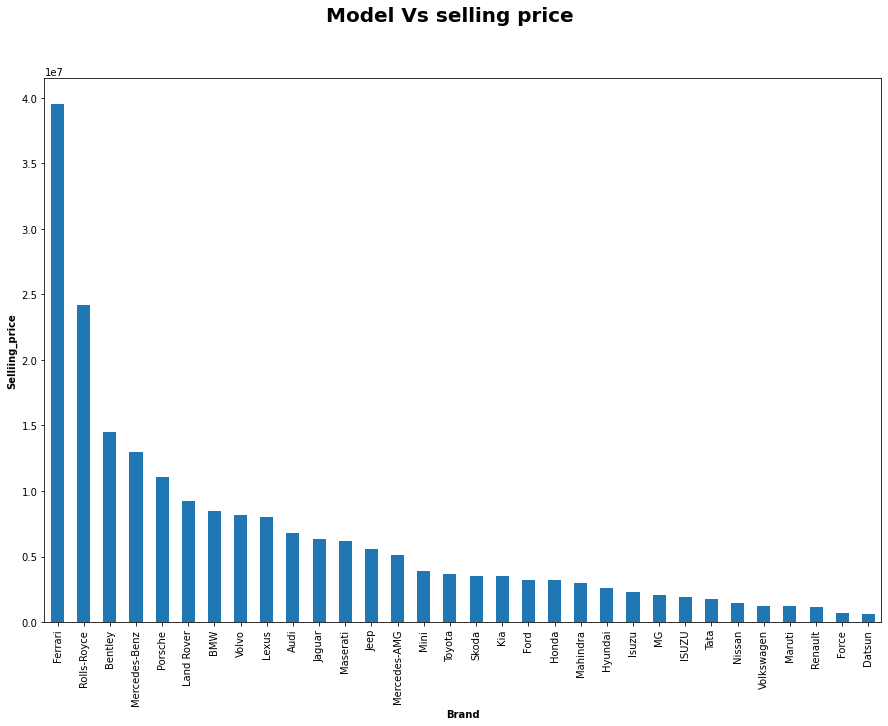

In [274]:
plt.figure(figsize=(15,10))
y.plot(kind = 'bar')
plt.suptitle('Model Vs selling price',  fontsize = 20, weight = 'bold')
plt.ylabel('Selliing_price', fontsize = 10, weight  ='bold')
plt.xlabel('Brand', fontsize = 10 , weight = 'bold')

Brand Name have impact on selling price


Most expensve model is ferrari 

In [285]:
 j  = df.groupby('car_name').selling_price.max().sort_values(ascending = False).iloc[:30]

In [286]:
j

car_name
Ferrari GTC4Lusso         39500000
Rolls-Royce Ghost         24200000
Bentley Continental       14500000
Mercedes-Benz S-Class     13000000
Porsche Cayenne           11100000
Land Rover Rover           9200000
BMW 7                      8500000
BMW Z4                     8250000
Volvo XC                   8195000
BMW X5                     8100000
Mercedes-Benz GLS          8000000
Lexus RX                   8000000
Mercedes-Benz GL-Class     7595000
Mercedes-Benz CLS          7500000
Volvo XC90                 6975000
Audi Q7                    6800000
Porsche Panamera           6500000
BMW X4                     6500000
BMW 6                      6500000
Lexus NX                   6400000
Jaguar F-PACE              6300000
Maserati Ghibli            6200000
BMW X3                     6100000
Maserati Quattroporte      6000000
Porsche Macan              5995000
BMW 5                      5800000
Mercedes-Benz E-Class      5743000
Jeep Wrangler              5600000
Audi A8    

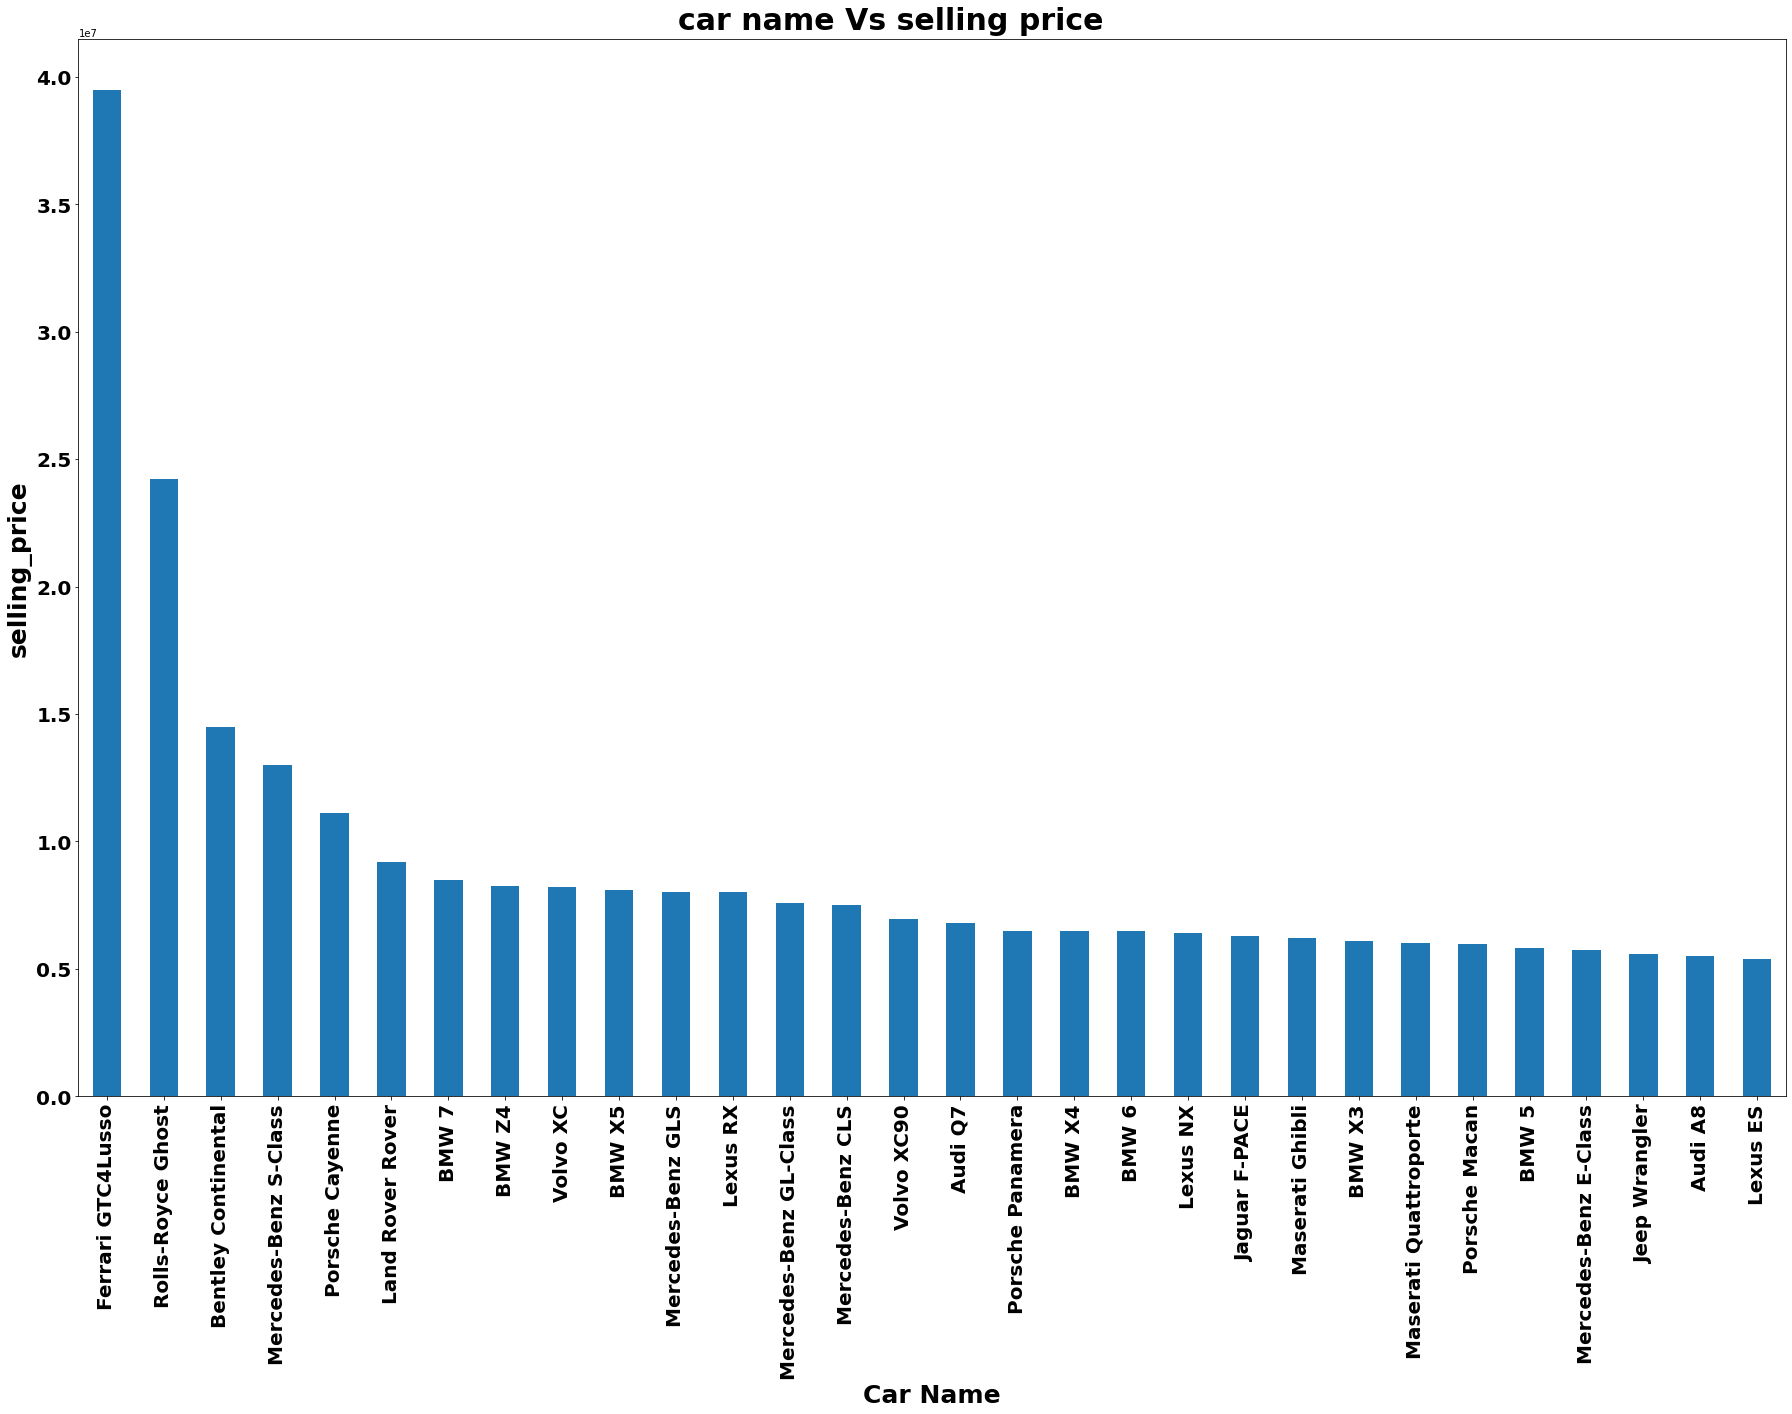

In [307]:
plt.figure(figsize = (25,20))
plt.suptitle('car name Vs selling price ', fontsize = 30, weight = 'bold')
j.plot(kind = 'bar')
plt.xlabel('Car Name', fontsize = 25, weight = 'bold')
plt.ylabel('selling_price',fontsize = 25, weight = 'bold')
plt.xticks(fontsize = 20, weight = 'bold' )
plt.yticks(fontsize = 20, weight = 'bold' )
plt.tight_layout()


Ferrari selling price is 3.95 Cr.

other than farrari selling prce of car is 2.5 cr

# more Mileage Brand and Car Name

In [318]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


In [320]:
m =df.groupby('brand').mileage.max().sort_values(ascending = False)

In [321]:
m

brand
Maruti           33.54
Hyundai          30.48
Honda            27.40
Tata             27.28
Ford             26.10
Mahindra         25.32
Renault          25.17
Toyota           23.87
Mini             23.80
Datsun           23.00
BMW              22.69
Lexus            22.37
Land Rover       22.30
Volkswagen       22.27
Skoda            21.72
Kia              20.80
Nissan           20.45
Maserati         20.41
Mercedes-Benz    19.71
Jaguar           19.33
Audi             18.53
Volvo            18.00
Porsche          17.85
MG               17.41
Jeep             17.10
Force            17.00
Isuzu            13.80
ISUZU            13.80
Mercedes-AMG     11.90
Rolls-Royce      10.20
Bentley           9.50
Ferrari           4.00
Name: mileage, dtype: float64

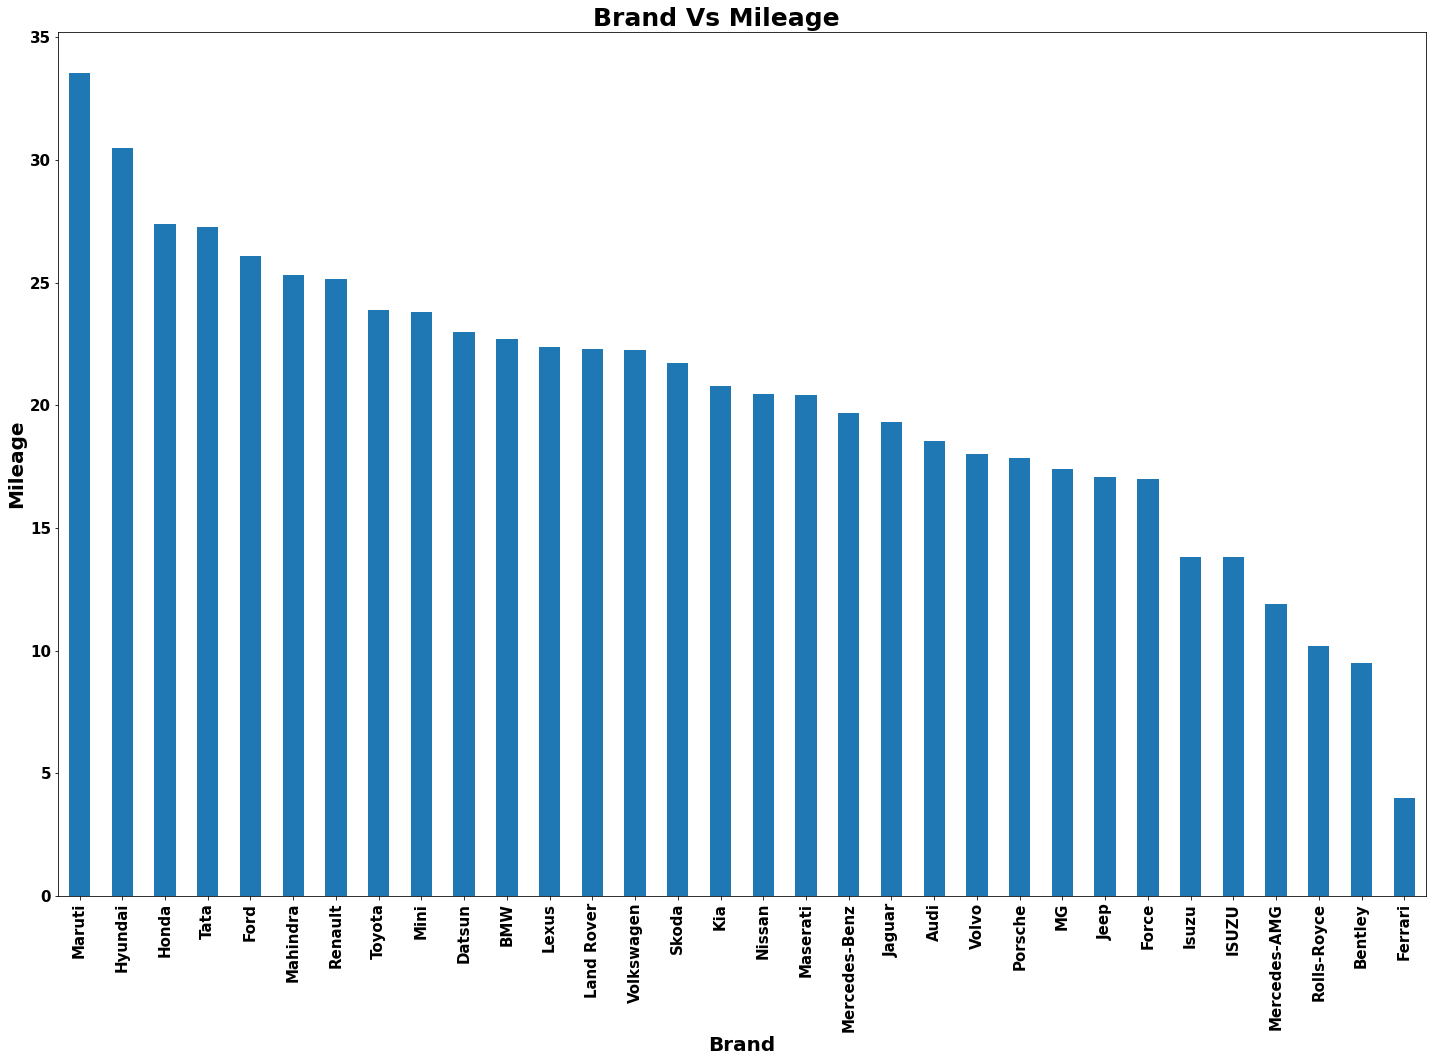

In [329]:
plt.figure(figsize = (20,15))
plt.suptitle("Brand Vs Mileage", fontsize = 25 , weight  = 'bold')
m.plot(kind = 'bar')
plt.xlabel('Brand', fontsize = 20, weight  = 'bold')
plt.ylabel('Mileage', fontsize = 20, weight  = 'bold')
plt.xticks(fontsize = 15, weight  = 'bold')
plt.yticks(fontsize = 15, weight  = 'bold')
plt.tight_layout()



Marut brand have more mileage 

In [332]:
m1 = df.groupby('car_name').mileage.max().sort_values(ascending = False).iloc[0:30]

In [333]:
m1

car_name
Maruti Wagon R        33.54
Maruti Alto           33.44
Maruti Celerio        31.79
Hyundai Santro        30.48
Maruti Swift Dzire    28.40
Maruti Swift          28.40
Maruti Ciaz           28.09
Honda Amaze           27.40
Maruti Baleno         27.39
Honda Jazz            27.30
Tata Tiago            27.28
Maruti Ertiga         26.80
Maruti Ignis          26.80
Ford Aspire           26.10
Honda City            26.00
Ford Figo             25.83
Honda WR-V            25.50
Mahindra KUV100       25.32
Mahindra KUV          25.32
Hyundai i20           25.20
Renault KWID          25.17
Hyundai Verna         25.00
Hyundai Grand         25.00
Tata Tigor            24.70
Ford Freestyle        24.40
Maruti Vitara         24.30
Maruti Dzire VXI      24.12
Toyota Glanza         23.87
Mini Cooper           23.80
Hyundai Venue         23.70
Name: mileage, dtype: float64

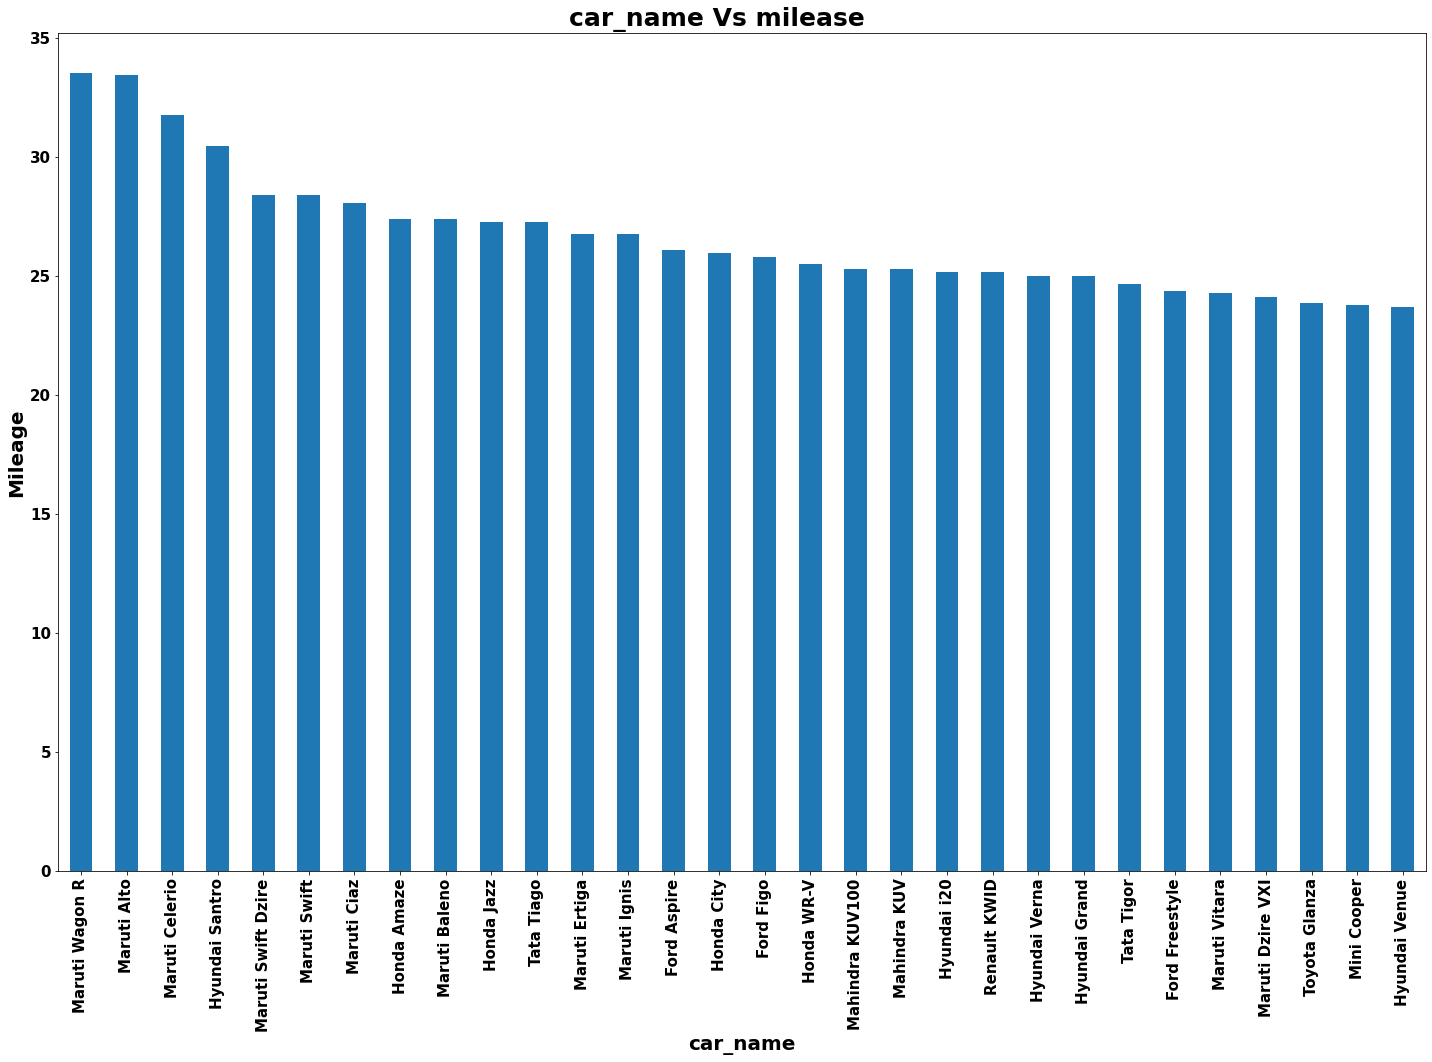

In [335]:
plt.figure(figsize = (20,15) )
plt.suptitle('car_name Vs milease' , fontsize = 25 , weight = 'bold' )
m1.plot(kind = 'bar')
plt.xlabel('car_name', fontsize = 20 , weight = 'bold')
plt.ylabel('Mileage', fontsize = 20 , weight = 'bold')
plt.xticks(fontsize = 15 , weight = 'bold')
plt.yticks(fontsize = 15 , weight = 'bold')
plt.tight_layout()

almost maruti wagonr and maruti alto have same mileage and its maximum

# Kilometer driven vs Selling Price

In [337]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


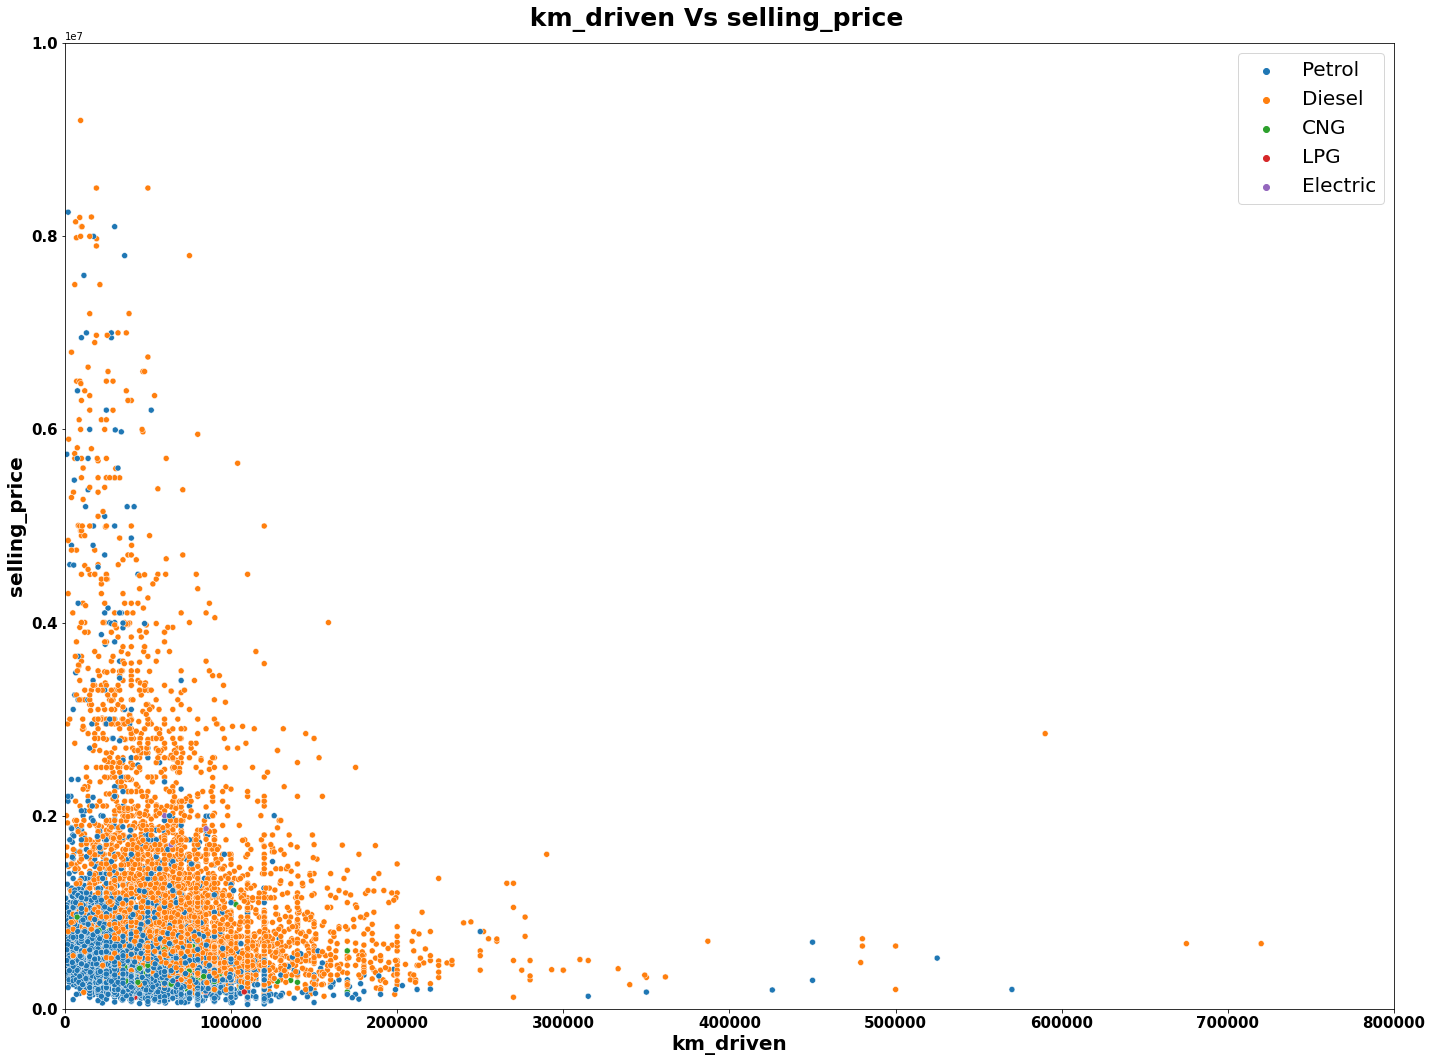

In [356]:
plt.figure(figsize = (20,15))
plt.suptitle(" km_driven Vs selling_price ", fontsize = 25, weight = 'bold')
sns.scatterplot(x = 'km_driven',y = 'selling_price', data = df,ec = "white",color='b',hue= 'fuel_type')
plt.xlabel('km_driven',fontsize = 20, weight = 'bold')
plt.ylabel('selling_price',fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.xlim(0,800000)
plt.ylim(0,10000000)
plt.legend( fontsize = 20)
plt.tight_layout()

car selling price is high which has less KM driven

maximum car sold beteen 0-20k km driven

# Fuel Type Selling Price

In [358]:
df.head(1)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000


In [371]:
ft = df.groupby('fuel_type').selling_price.mean().sort_values(ascending = False)

In [374]:
ft

fuel_type
Electric    1.853500e+06
Diesel      1.000469e+06
Petrol      5.728619e+05
CNG         4.176877e+05
LPG         2.062727e+05
Name: selling_price, dtype: float64

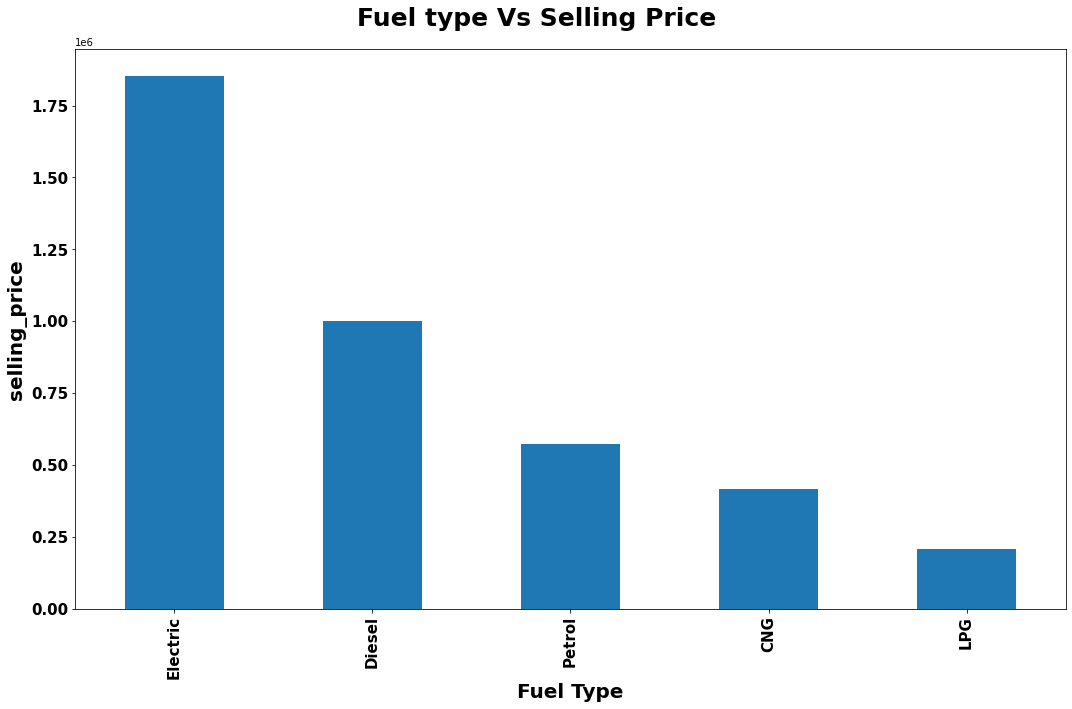

In [375]:
plt.figure(figsize = (15,10))
plt.suptitle('Fuel type Vs Selling Price', fontsize = 25, weight = 'bold')
ft.plot(kind = 'bar')
plt.xlabel('Fuel Type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()

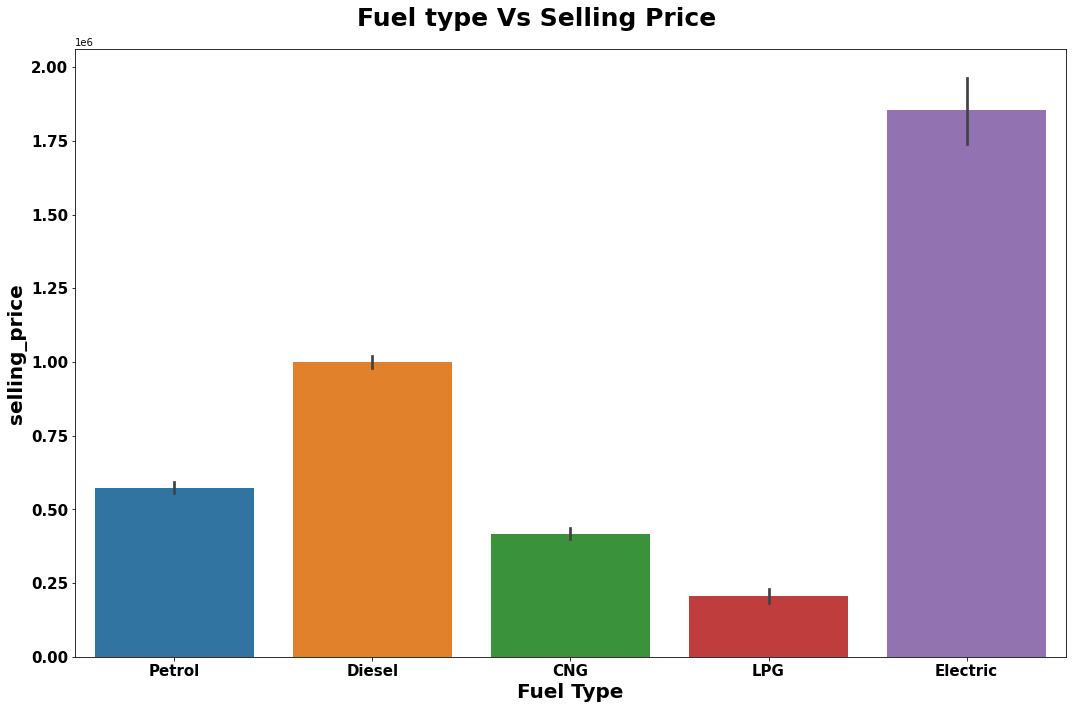

In [398]:
plt.figure(figsize = (15,10))
plt.suptitle('Fuel type Vs Selling Price', fontsize = 25, weight = 'bold')
sns.barplot(x = 'fuel_type', y= 'selling_price', data = df)
plt.xlabel('Fuel Type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()

electric vehicle has more average selling price

# Fuel Type Count

In [389]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [385]:
df.groupby('fuel_type').count()

,car_name,brand,model,vehicle_age,km_driven,seller_type,transmission_type,mileage,engine,max_power,seats,selling_price
fuel_type,,,,,,,,,,,,
CNG,301,301,301,301,301,301,301,301,301,301,301,301
Diesel,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419
Electric,4,4,4,4,4,4,4,4,4,4,4,4
LPG,44,44,44,44,44,44,44,44,44,44,44,44
Petrol,7643,7643,7643,7643,7643,7643,7643,7643,7643,7643,7643,7643


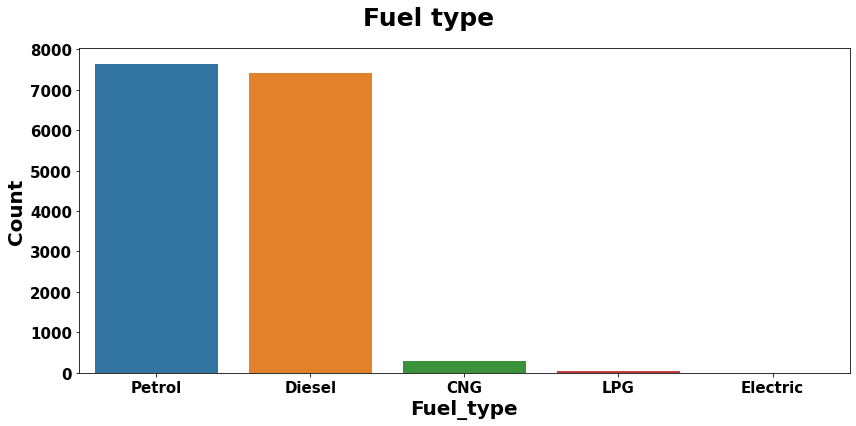

In [382]:
plt.figure(figsize = (12,6))
plt.suptitle('Fuel type',fontsize = 25, weight = 'bold')
sns.countplot(x = df['fuel_type'])
plt.xlabel('Fuel_type' , fontsize = 20, weight = 'bold')
plt.ylabel('Count' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()


most of the car is petrol fuel type and very less electric 

petrol and diesel cars are almost equivalent

# Mileage vs Selling Price

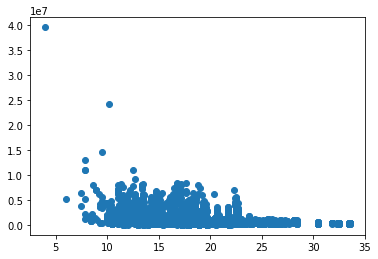

In [450]:
plt.scatter(x = df['mileage'] , y = df['selling_price'])

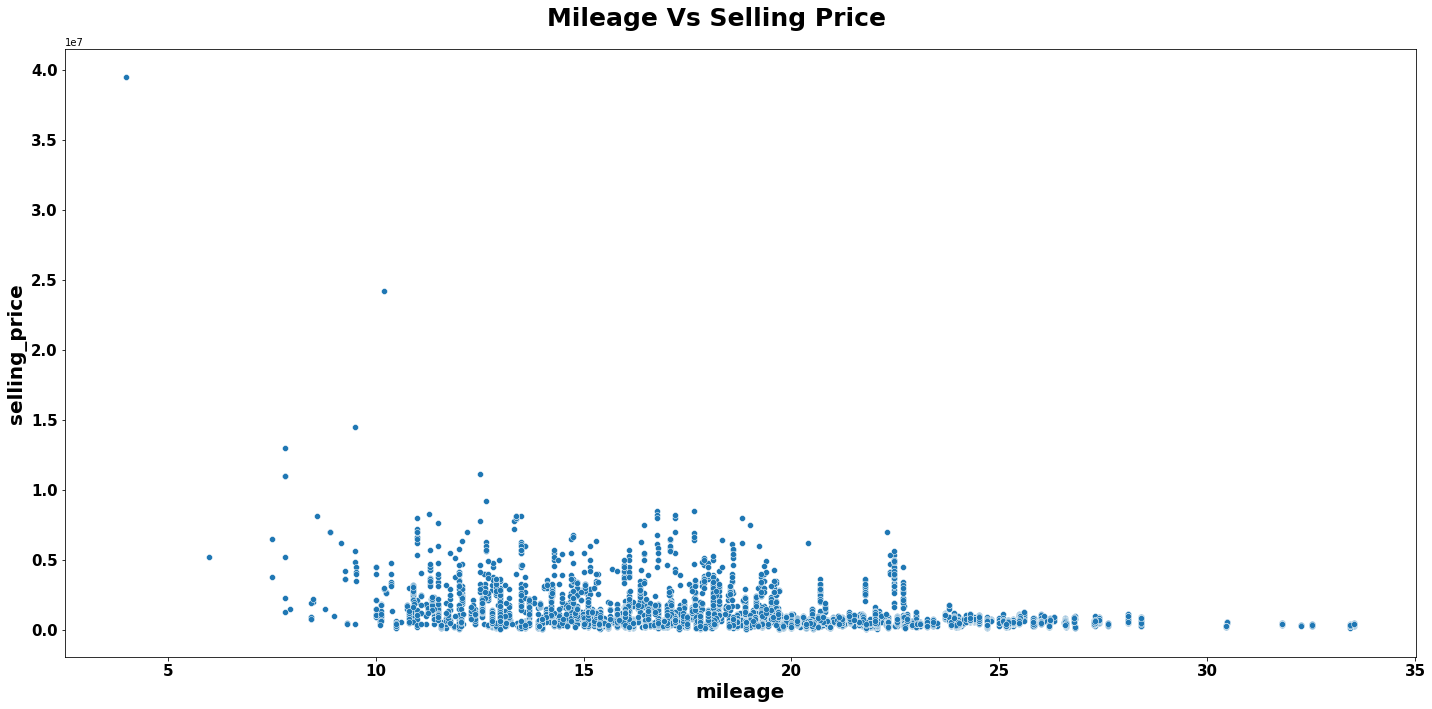

In [452]:
plt.figure(figsize = (20,10))
plt.suptitle('Mileage Vs Selling Price' , fontsize = 25 , weight = 'bold')
sns.scatterplot(x = 'mileage',y = 'selling_price', data = df)
plt.xlabel('mileage',fontsize = 20 , weight = 'bold')
plt.ylabel('selling_price',fontsize = 20 , weight = 'bold')
plt.xticks(fontsize = 15 , weight = 'bold')
plt.yticks(fontsize = 15 , weight = 'bold')
plt.tight_layout()

In [453]:
df.head(1)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000


In [457]:
df[df_num]

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.70,796,46.30,5,120000
1,5,20000,18.90,1197,82.00,5,550000
2,11,60000,17.00,1197,80.00,5,215000
3,9,37000,20.92,998,67.10,5,226000
4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000
19540,2,18000,17.50,1373,91.10,7,925000
19541,6,67000,21.14,1498,103.52,5,425000
19542,5,3800000,16.00,2179,140.00,7,1225000


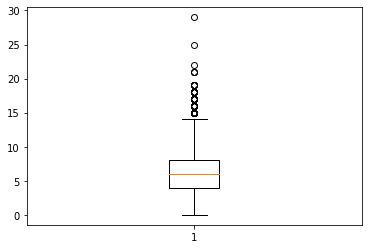

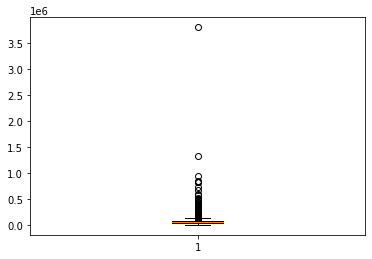

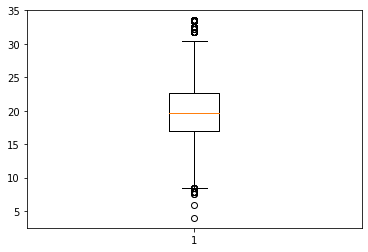

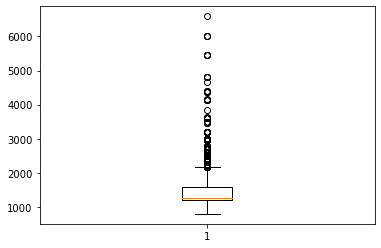

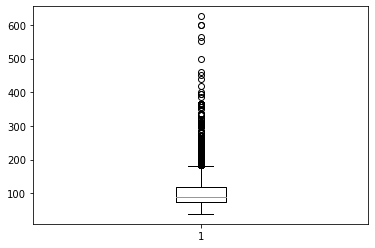

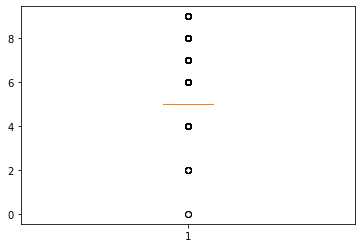

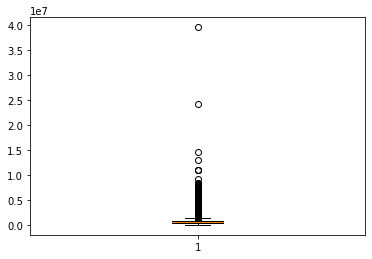

In [475]:
for i in df_num:
    plt.show()
    plt.boxplot(df[i])
  
    

In [469]:
df_num

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

# Vehicle Age vs Mileage

In [441]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


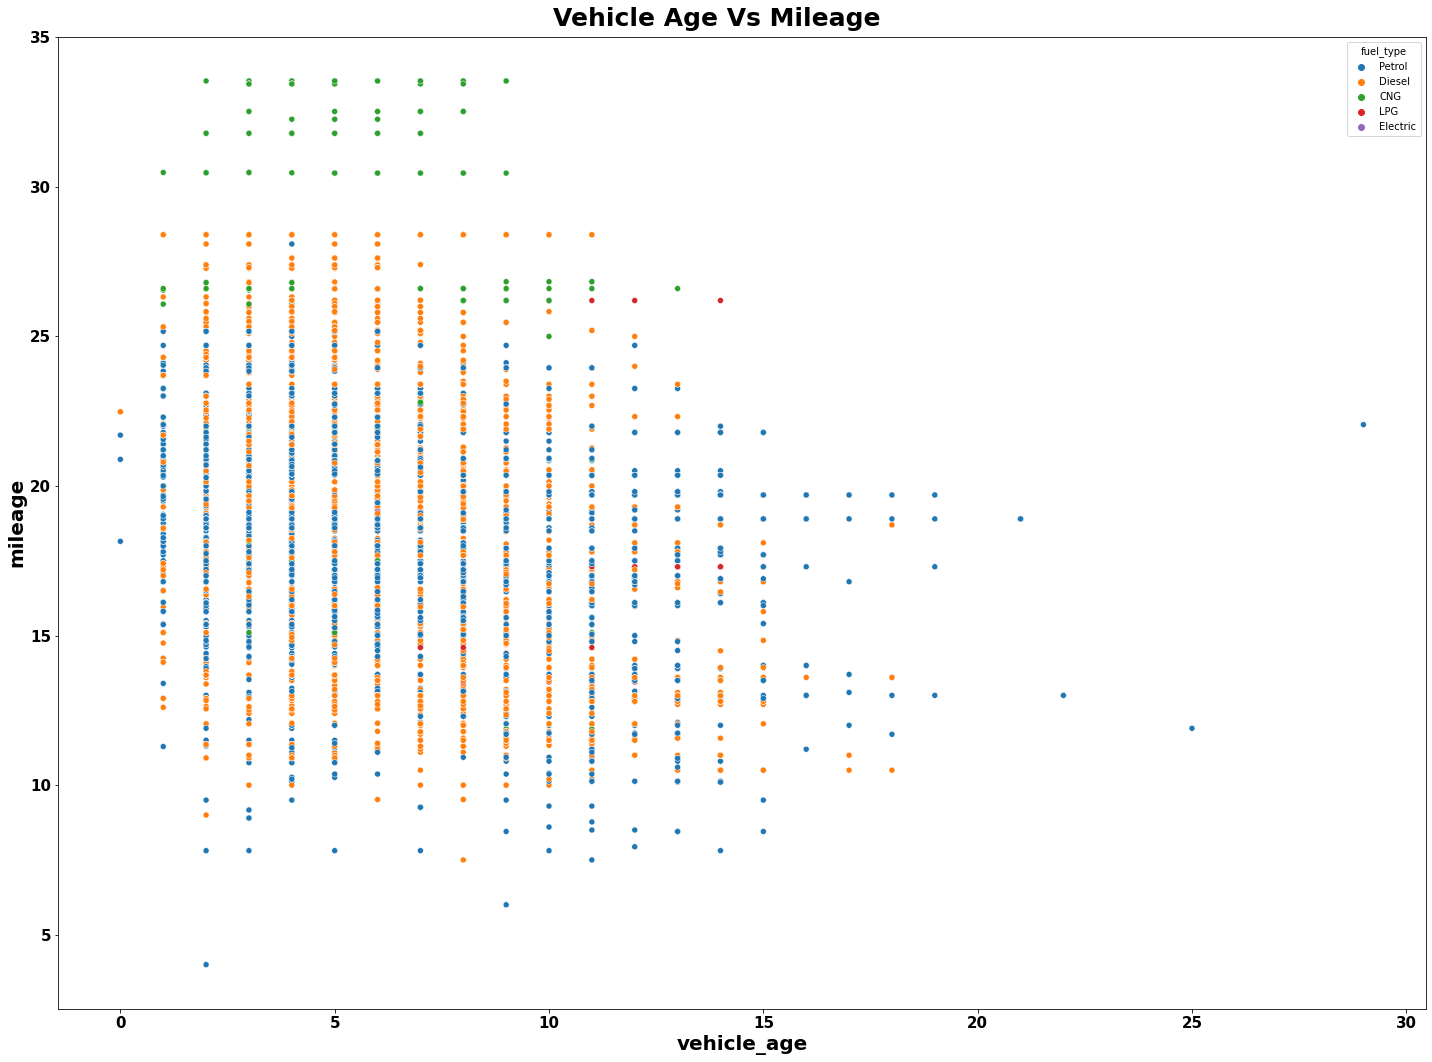

In [448]:
plt.figure(figsize = (20,15))
plt.suptitle('Vehicle Age Vs Mileage', fontsize = 25, weight = 'bold')
sns.scatterplot(x = df['vehicle_age'], y = df['mileage'],data = df, hue = df['fuel_type'])
plt.xlabel('vehicle_age' , fontsize = 20, weight = 'bold')
plt.ylabel('mileage' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()



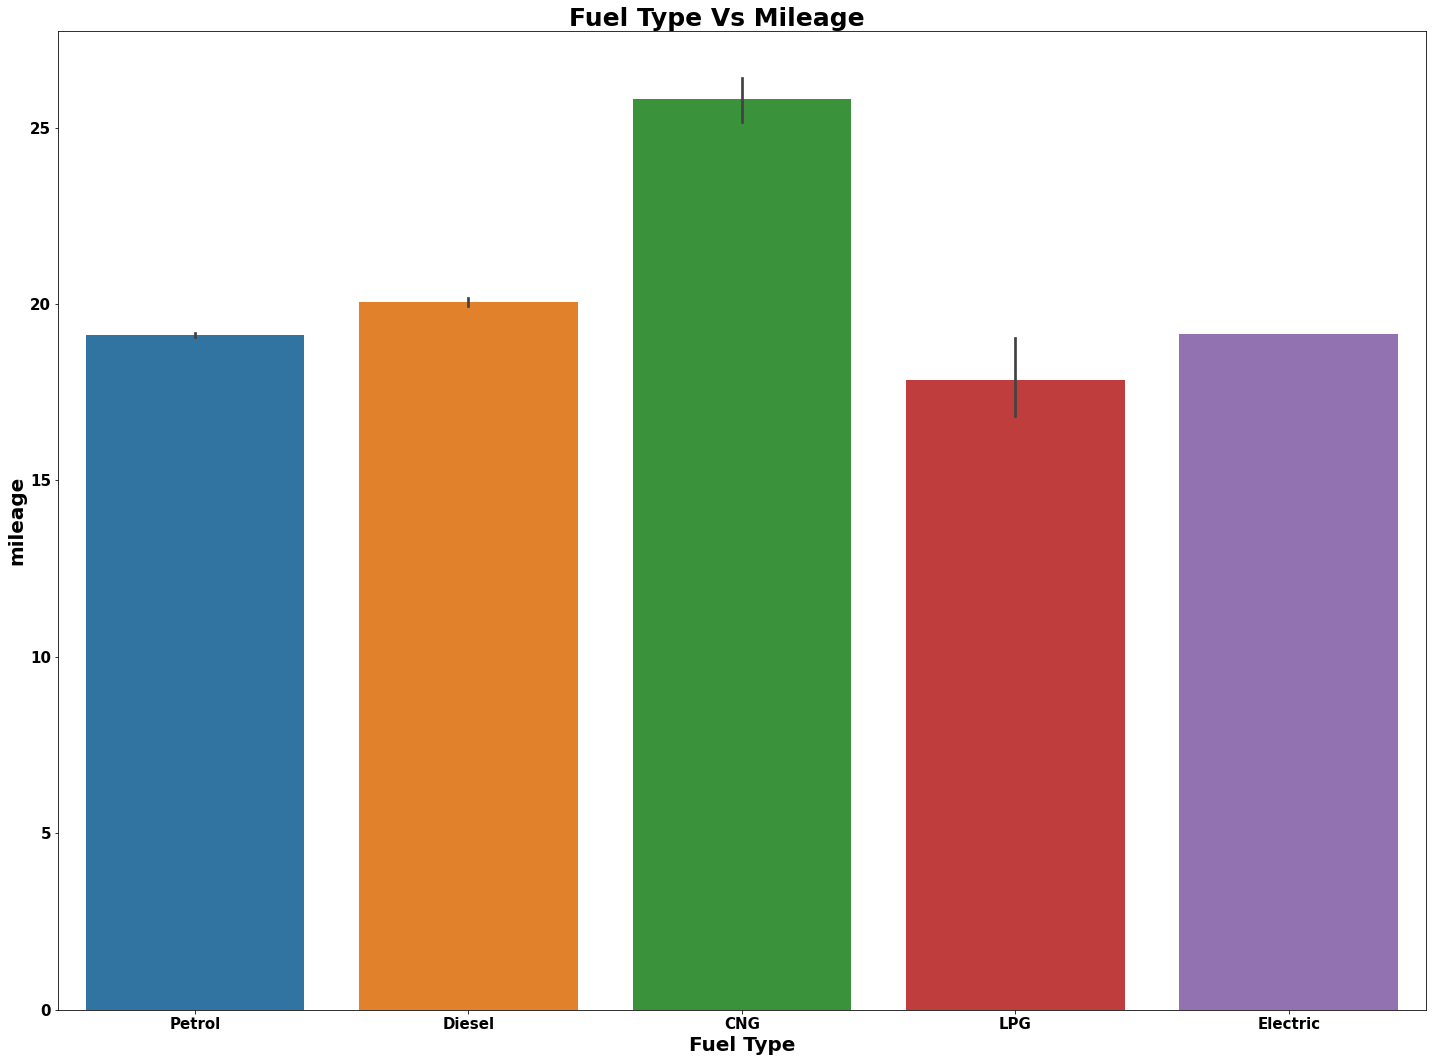

In [449]:
plt.figure(figsize = (20,15))
plt.suptitle('Fuel Type Vs Mileage', fontsize = 25, weight = 'bold')
sns.barplot(x = 'fuel_type', y = 'mileage',data = df)
plt.xlabel('Fuel Type' , fontsize = 20, weight = 'bold')
plt.ylabel('mileage' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()


Mostly 0 to 15 years old vehicle is sold

CNG fuel type have more mileage

mileage vary from 10 to 33

# Transmission type Count

In [439]:
df.groupby('transmission_type').count()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,mileage,engine,max_power,seats,selling_price
transmission_type,,,,,,,,,,,,
Automatic,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186
Manual,12225,12225,12225,12225,12225,12225,12225,12225,12225,12225,12225,12225


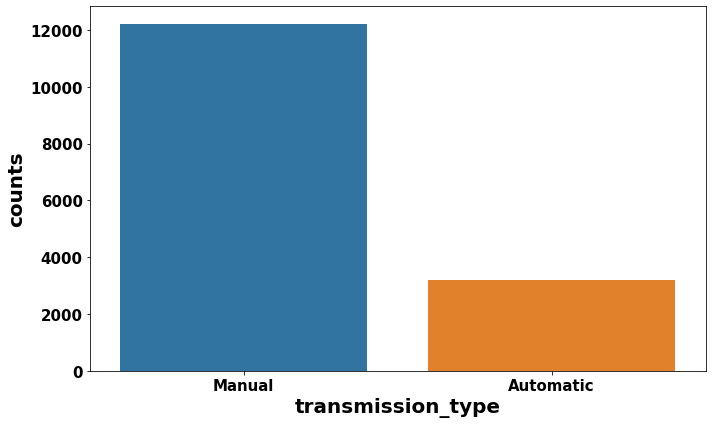

In [408]:
plt.figure(figsize =(10,6))
sns.countplot(x = 'transmission_type', data = df )
plt.xlabel('transmission_type' , fontsize = 20, weight = 'bold')
plt.ylabel('counts' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()


From Above plot it clearly indicates manual transmission type car is sold more

# Transmission type vs Price

In [399]:
df.head(1)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000


In [402]:
tt = df.groupby('transmission_type').selling_price.mean().sort_values(ascending = False)

In [403]:
tt

transmission_type
Automatic    1.579557e+06
Manual       5.652852e+05
Name: selling_price, dtype: float64

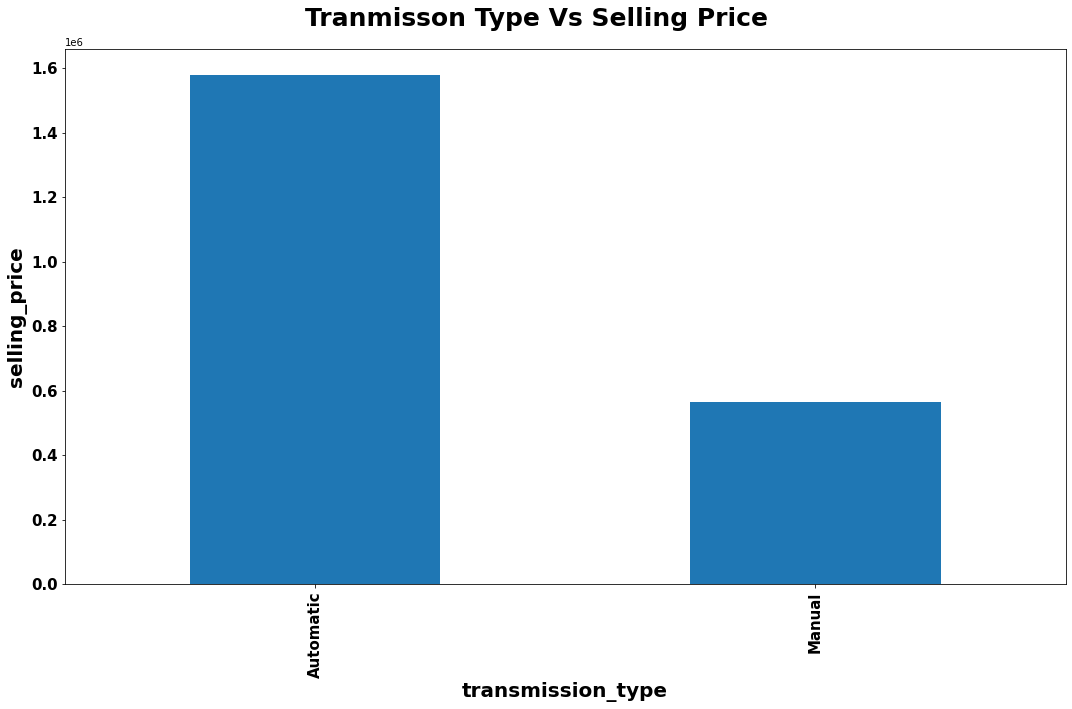

In [404]:
plt.figure(figsize =(15,10))
plt.suptitle('Tranmisson Type Vs Selling Price', fontsize = 25, weight = 'bold')
tt.plot(kind = 'bar')
plt.xlabel('transmission_type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()

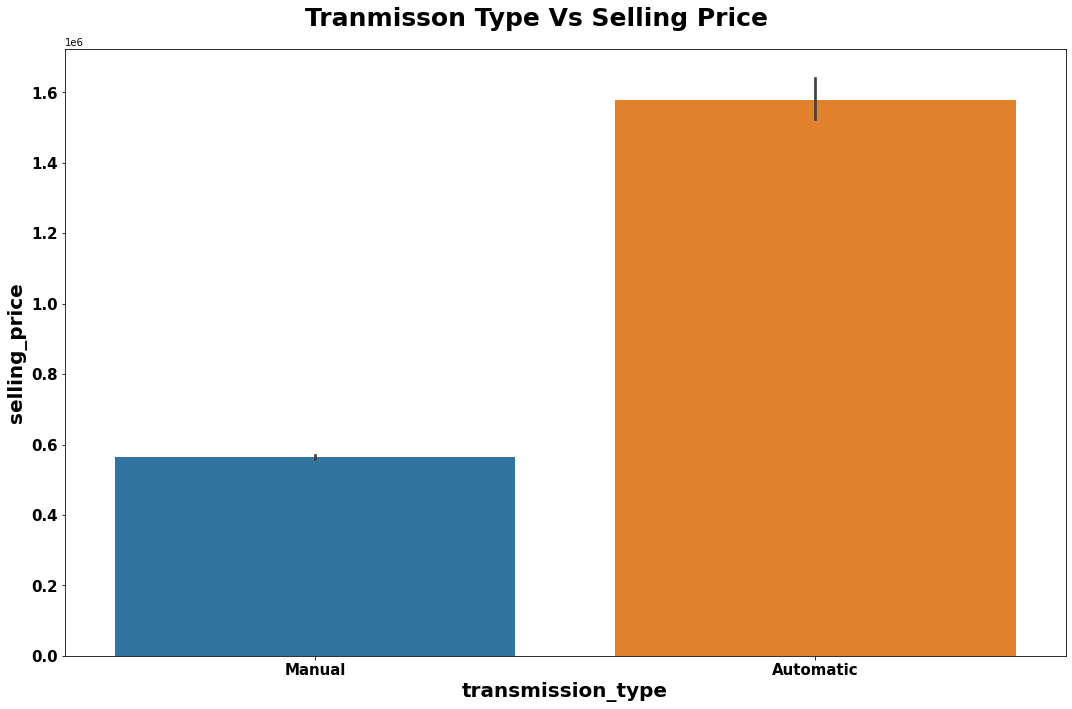

In [405]:
#another way
plt.figure(figsize =(15,10))
plt.suptitle('Tranmisson Type Vs Selling Price', fontsize = 25, weight = 'bold')
sns.barplot(x= 'transmission_type'  , y = 'selling_price', data = df)
plt.xlabel('transmission_type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()

from above graph it is clearly shows that automatic transmission type car has more price

# Seller Type vs selling_priice

In [393]:
st = df.groupby('seller_type').selling_price.mean().sort_values(ascending = False)

In [394]:
st

seller_type
Dealer              872505.503722
Individual          617880.483418
Trustmark Dealer    571959.537572
Name: selling_price, dtype: float64

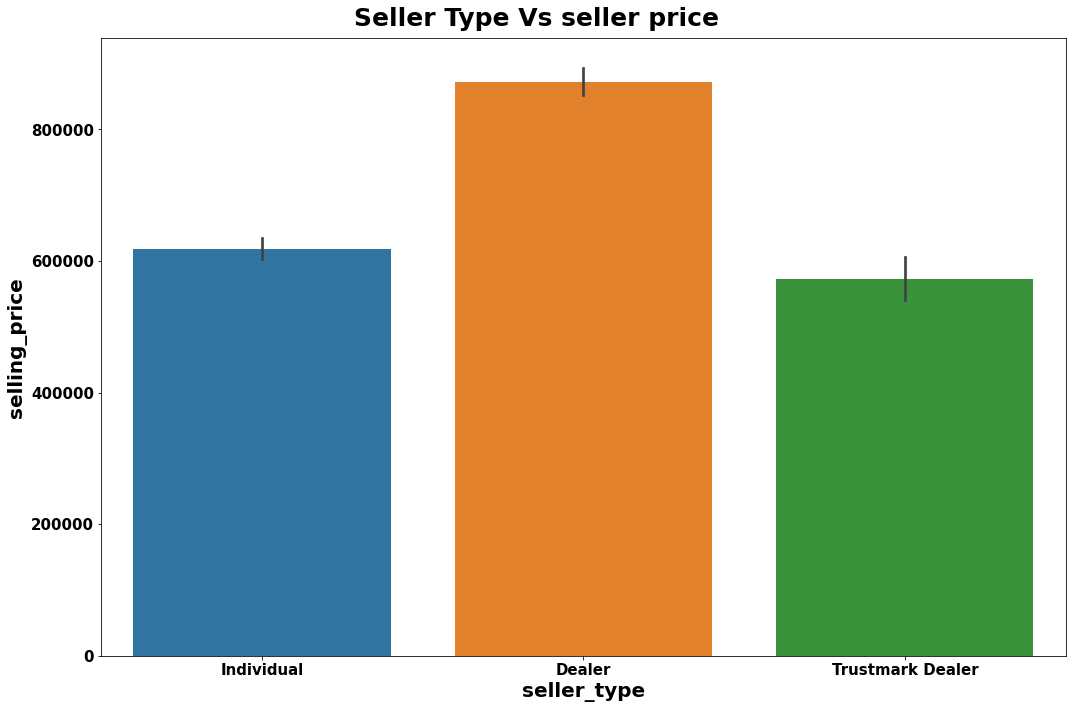

In [396]:
plt.figure(figsize = (15,10))
plt.suptitle('Seller Type Vs seller price', fontsize = 25 , weight = 'bold')
sns.barplot(x = 'seller_type',y='selling_price', data = df)
plt.xlabel('seller_type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()

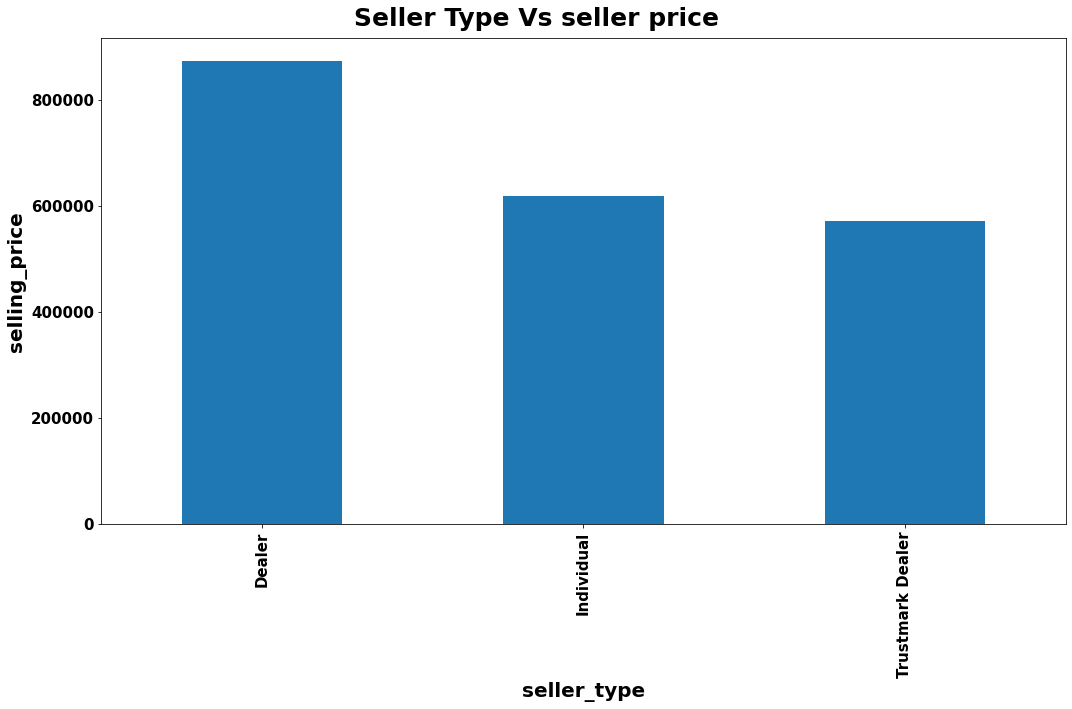

In [397]:
# another way
plt.figure(figsize = (15,10))
plt.suptitle('Seller Type Vs seller price', fontsize = 25 , weight = 'bold')
st.plot(kind = 'bar')
plt.xlabel('seller_type' , fontsize = 20, weight = 'bold')
plt.ylabel('selling_price' , fontsize = 20, weight = 'bold')
plt.xticks(fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.tight_layout()